In [18]:
import pandas as pd

In [22]:
#match url
url = 'https://fbref.com/en/matches/402a27f7/Bay-FC-Angel-City-FC-June-22-2024-NWSL'
df = pd.read_html(url, attrs={'id': 'shots_all'})[0]

In [23]:
df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
              Minute             Player              Squad                 xG   
0                  2    Gisele Thompson         Angel City               0.06   
1                  8      Dorian Bailey             Bay FC               0.03   
2                 15       Mary Vignola         Angel City               0.17   
3                 15      Sydney Leroux         Angel City               0.80   
4                 20     Asisat Oshoala             Bay FC               0.02   

  Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0 Unnamed: 7_level_0  \
                PSxG            Outcome           Distance          Body Part   
0                NaN         Off Target               12.0          Left Foot   
1                NaN         Off Target               28.0          Left Foot   
2                NaN         Off Target                9.0               Head   
3               0.89              Saved                4.0          Left Foot   
4                NaN         Off Target               24.0         Right Foot   

  Unnamed: 8_level_0            SCA 1                           SCA 2  \
               Notes           Player        Event             Player   
0                NaN  Gisele Thompson      Take-On  Clarisse Le Bihan   
1                NaN     Kiki Pickett  Pass (Live)                NaN   
2                NaN    Claire Emslie  Pass (Live)  Clarisse Le Bihan   
3                NaN     Mary Vignola         Shot                NaN   
4                NaN       Tess Boade  Pass (Live)      Dorian Bailey   

                
         Event  
0  Pass (Live)  
1          NaN  
2  Pass (Live)  
3          NaN  
4  Pass (Live)

In [24]:
df = df.drop(columns=[x for x in df.columns if 'SCA' in x[0]])

In [25]:
df.columns=df.columns.droplevel(0)

In [26]:
df = df[['Minute', 'Player', 'Squad', 'xG', 'Outcome']]

In [27]:
df.head()

,Minute,Player,Squad,xG,Outcome
0,2,Gisele Thompson,Angel City,0.06,Off Target
1,8,Dorian Bailey,Bay FC,0.03,Off Target
2,15,Mary Vignola,Angel City,0.17,Off Target
3,15,Sydney Leroux,Angel City,0.80,Saved
4,20,Asisat Oshoala,Bay FC,0.02,Off Target


In [28]:
#calculate cumulative xG
df['cumulative_xG'] = df.groupby('Squad')['xG'].cumsum()

In [29]:
df

,Minute,Player,Squad,xG,Outcome,cumulative_xG
0,2,Gisele Thompson,Angel City,0.06,Off Target,0.06
1,8,Dorian Bailey,Bay FC,0.03,Off Target,0.03
2,15,Mary Vignola,Angel City,0.17,Off Target,0.23
3,15,Sydney Leroux,Angel City,0.80,Saved,1.03
4,20,Asisat Oshoala,Bay FC,0.02,Off Target,0.05
5,24,Asisat Oshoala,Bay FC,0.16,Off Target,0.21
6,29,Raquel Rodríguez,Angel City,0.18,Woodwork,1.21
7,33,Tess Boade,Bay FC,0.17,Goal,0.38
8,36,Asisat Oshoala,Bay FC,0.12,Off Target,0.50
9,45+1,Racheal Kundananji,Bay FC,0.02,Off Target,0.52


In [30]:
#drop minutes with NaN
df = df.dropna(subset=["Minute"])
df

,Minute,Player,Squad,xG,Outcome,cumulative_xG
0,2,Gisele Thompson,Angel City,0.06,Off Target,0.06
1,8,Dorian Bailey,Bay FC,0.03,Off Target,0.03
2,15,Mary Vignola,Angel City,0.17,Off Target,0.23
3,15,Sydney Leroux,Angel City,0.80,Saved,1.03
4,20,Asisat Oshoala,Bay FC,0.02,Off Target,0.05
5,24,Asisat Oshoala,Bay FC,0.16,Off Target,0.21
6,29,Raquel Rodríguez,Angel City,0.18,Woodwork,1.21
7,33,Tess Boade,Bay FC,0.17,Goal,0.38
8,36,Asisat Oshoala,Bay FC,0.12,Off Target,0.50
9,45+1,Racheal Kundananji,Bay FC,0.02,Off Target,0.52


In [31]:
#split match into halves
df['half'] = df["Minute"].apply(lambda x: 1 if int(x.split('+')[0]) <= 45 
                                   else 2)

C:\Users\fredd\AppData\Local\Temp\ipykernel_10244\2617189078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['half'] = df["Minute"].apply(lambda x: 1 if int(x.split('+')[0]) <= 45


In [32]:
df.head()

,Minute,Player,Squad,xG,Outcome,cumulative_xG,half
0,2,Gisele Thompson,Angel City,0.06,Off Target,0.06,1
1,8,Dorian Bailey,Bay FC,0.03,Off Target,0.03,1
2,15,Mary Vignola,Angel City,0.17,Off Target,0.23,1
3,15,Sydney Leroux,Angel City,0.80,Saved,1.03,1
4,20,Asisat Oshoala,Bay FC,0.02,Off Target,0.05,1


In [33]:
df["Minute"] = df["Minute"].apply(lambda x: sum([int(y) for y in x.split('+')]))

C:\Users\fredd\AppData\Local\Temp\ipykernel_10244\2303675244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Minute"] = df["Minute"].apply(lambda x: sum([int(y) for y in x.split('+')]))


In [34]:
df.tail()

,Minute,Player,Squad,xG,Outcome,cumulative_xG,half
15,60,Megan Reid,Angel City,0.02,Off Target,1.37,2
16,71,Racheal Kundananji,Bay FC,0.08,Saved,0.76,2
17,71,Racheal Kundananji,Bay FC,0.11,Saved,0.87,2
18,82,Kennedy Fuller,Angel City,0.07,Blocked,1.44,2
19,96,Megan Reid,Angel City,0.02,Blocked,1.46,2


In [35]:
df

,Minute,Player,Squad,xG,Outcome,cumulative_xG,half
0,2,Gisele Thompson,Angel City,0.06,Off Target,0.06,1
1,8,Dorian Bailey,Bay FC,0.03,Off Target,0.03,1
2,15,Mary Vignola,Angel City,0.17,Off Target,0.23,1
3,15,Sydney Leroux,Angel City,0.80,Saved,1.03,1
4,20,Asisat Oshoala,Bay FC,0.02,Off Target,0.05,1
5,24,Asisat Oshoala,Bay FC,0.16,Off Target,0.21,1
6,29,Raquel Rodríguez,Angel City,0.18,Woodwork,1.21,1
7,33,Tess Boade,Bay FC,0.17,Goal,0.38,1
8,36,Asisat Oshoala,Bay FC,0.12,Off Target,0.50,1
9,46,Racheal Kundananji,Bay FC,0.02,Off Target,0.52,1


In [36]:
#create variables for team colours
HOME_COLOR = '#DBE2E9'
AWAY_COLOR = '#FCC9BF'

Text(0.1, 0.0, '@freddys_canvas/twitter \n Data: FBREF')

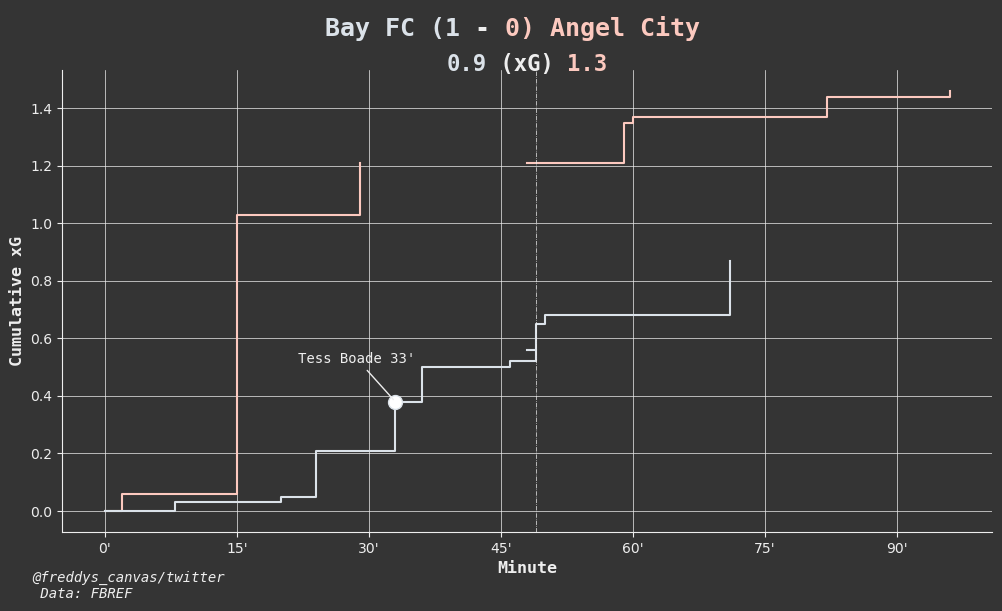

In [37]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

#change background colours
fig.set_facecolor('#343434')
ax.set_facecolor('#343434')


# Plot the xG for each team by half
# We want to make it so the lines both start at 0

for team in df['Squad'].unique():
    
    team_df = df[df['Squad'] == team]
    
    # add a 0 xG row at the start of the match
    team_df = pd.concat([pd.DataFrame({'Squad': team, 'Minute': 0, 'xG': 0, 'Outcome': 'Goal', 'cumulative_xG': 0, 'half': 1}, index=[0]), team_df])
    
    # Also add a row at the beginning of the second half to make the lines start where the first half ended
    team_df = pd.concat([team_df[team_df['half'] == 1], pd.DataFrame({'Squad': team, 'Minute': 48, 'xG': 0, 'Outcome': 'Goal', 'cumulative_xG': team_df[team_df['half'] == 1]['cumulative_xG'].iloc[-1], 'half': 2}, index=[0]), team_df[team_df['half'] == 2]])

    for half in team_df['half'].unique():
        half_df = team_df[team_df['half'] == half]
        ax.plot(
            half_df['Minute'], 
            half_df['cumulative_xG'], 
            label=team, 
            drawstyle='steps-post',
            c=HOME_COLOR if team == 'Bay FC' else AWAY_COLOR
        )   
        

# We Can add a scatter plot to show the goals
for team in df['Squad'].unique():
    team_df = df[(df['Squad'] == team) & (df['Outcome'] == 'Goal')].to_dict(orient='records')
    for x in team_df:
        ax.scatter(
            x['Minute'], 
            x['cumulative_xG'], 
            c='white',
            edgecolor=HOME_COLOR if team == 'Bay FC' else  AWAY_COLOR,
            s=100,
            # We want the goals to be on top of the lines
            zorder=5
        )
        
        # add a label to the goals for the player who scored
#         ax.text(
#             x['Minute'], 
#             x['cumulative_xG'] - .07, 
#             #x['Player'],
#             f"{x['Player']} ({x['Minute']}', xG: {x['cumulative_xG']:.2f})",
#             ha='center', 
#             va='center', 
#             fontfamily='monospace', 
#             fontsize=10,
#             zorder=12
#         )
        #add label for the goals
        ax.annotate(
            f"{x['Player']} {x['Minute']}'",
            xy=(x['Minute'], x['cumulative_xG']),  # Point to the goal
            xytext=(x['Minute'] - 4.4, x['cumulative_xG'] + 0.15),  # Position the text
            ha='center',
            va='center',
            fontfamily='monospace',
            fontsize=10,
            zorder=12,
            color='#EEEEEE',
            arrowprops=dict(arrowstyle='-', color='#EEEEEE')
        )
        
        #add label for xG
       
        
# Let's label the x axis with first and second half
ax.set_xticks([0, 15, 30, 45, 60, 75, 90])
ax.set_xticklabels(['0\'', '15\'', '30\'', '45\'', '60\'', '75\'', '90\''], color='#EEEEEE')
ax.set_xlabel('Minute', fontfamily='monospace', fontsize=12, color='#EEEEEE', fontweight='bold')

# Let's label the y axis with the cumulative xG
ax.set_ylabel('Cumulative xG', fontfamily='monospace', fontsize=12, fontweight='bold', color='#EEEEEE')

#add grids
ax.grid(ls='solid',lw=.5,color='#EEEEEE',which='both',zorder=1)

#add dotted line to separate halves
ax.axvline(x=49, ls='dashdot', color='#EEEEEE', lw=.5)

# Let's get rid of the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#change axis label colours
ax.xaxis.label.set_color('#EEEEEE')
ax.yaxis.label.set_color('#EEEEEE')

#change axis colours
ax.spines['left'].set_color('#EEEEEE')
ax.spines['bottom'].set_color('#EEEEEE')
ax.tick_params(axis='x', colors='#EEEEEE')
ax.tick_params(axis='y', colors='#EEEEEE')

#add titles
# fig.suptitle("Angel City (3 - 2) Racing Louisville", color='#EEEEEE',
#             fontsize=18)


# # Let's change the color of the title to show which team is which using the highlight-text package
from highlight_text import fig_text

fig_text(
    0.5,
    0.95,
    '<Bay FC (1> - <0) Angel City>', 
    fontsize=18, 
    ha='center', 
    va='center',
    color='#EEEEEE',
    ax=ax, 
    fontproperties='monospace',
    fontweight='bold',
    highlight_textprops=[{'color': HOME_COLOR}, {'color': AWAY_COLOR}]
)


fig_text(
    0.512,
    0.89,
    '<0.9> (xG) <1.3>', 
    fontsize=16, 
    ha='center', 
    va='center', 
    ax=ax, 
    color='#EEEEEE',
    fontproperties='monospace',
    fontweight='semibold',
    highlight_textprops=[{'color': HOME_COLOR}, {'color': AWAY_COLOR}]
)


# fig_text(
#     0.448,
#     0.89,
#     '<1.4> (xG) <0.5>', 
#     fontsize=14, 
#     ha='center', 
#     va='center', 
#     ax=ax, 
#     fontproperties='monospace',
#     fontweight='semibold',
#     highlight_textprops=[{'color': HOME_COLOR}, {'color': AWAY_COLOR}]
# )


# Now let's add a twitter @ to the bottom left of the plot
fig.text(
    0.1, 
    0.00, 
    '@freddys_canvas/twitter \n Data: FBREF', 
    fontsize=10, 
    fontstyle='oblique', 
    fontfamily='monospace', 
    color='#EEEEEE'
)

In [38]:
#save image: C:/Users/fredd\OneDrive/Pictures/data-vizes/xG-plots
fig.savefig('C:/Users/fredd/OneDrive/Pictures/data-vizes/xG-plots/bay-acfc.png', dpi=300, bbox_inches='tight')